epoch:0, train acc:0.12, test acc:0.0998
epoch:1, train acc:0.143333333333, test acc:0.1093
epoch:2, train acc:0.18, test acc:0.1277
epoch:3, train acc:0.2, test acc:0.1344
epoch:4, train acc:0.21, test acc:0.1426
epoch:5, train acc:0.223333333333, test acc:0.1544
epoch:6, train acc:0.25, test acc:0.1626
epoch:7, train acc:0.256666666667, test acc:0.1691
epoch:8, train acc:0.293333333333, test acc:0.1833
epoch:9, train acc:0.306666666667, test acc:0.1918
epoch:10, train acc:0.343333333333, test acc:0.2134
epoch:11, train acc:0.34, test acc:0.2156
epoch:12, train acc:0.366666666667, test acc:0.2282
epoch:13, train acc:0.376666666667, test acc:0.2364
epoch:14, train acc:0.39, test acc:0.2475
epoch:15, train acc:0.39, test acc:0.259
epoch:16, train acc:0.406666666667, test acc:0.2663
epoch:17, train acc:0.423333333333, test acc:0.2761
epoch:18, train acc:0.443333333333, test acc:0.289
epoch:19, train acc:0.453333333333, test acc:0.2942
epoch:20, train acc:0.47, test acc:0.3145
epoch:21, t

epoch:167, train acc:0.86, test acc:0.659
epoch:168, train acc:0.87, test acc:0.6603
epoch:169, train acc:0.873333333333, test acc:0.6611
epoch:170, train acc:0.866666666667, test acc:0.6607
epoch:171, train acc:0.87, test acc:0.6604
epoch:172, train acc:0.863333333333, test acc:0.6731
epoch:173, train acc:0.853333333333, test acc:0.6718
epoch:174, train acc:0.873333333333, test acc:0.6655
epoch:175, train acc:0.866666666667, test acc:0.6693
epoch:176, train acc:0.873333333333, test acc:0.6625
epoch:177, train acc:0.87, test acc:0.6609
epoch:178, train acc:0.87, test acc:0.661
epoch:179, train acc:0.88, test acc:0.6727
epoch:180, train acc:0.86, test acc:0.662
epoch:181, train acc:0.883333333333, test acc:0.6656
epoch:182, train acc:0.88, test acc:0.6674
epoch:183, train acc:0.876666666667, test acc:0.6673
epoch:184, train acc:0.876666666667, test acc:0.6646
epoch:185, train acc:0.87, test acc:0.6515
epoch:186, train acc:0.866666666667, test acc:0.6606
epoch:187, train acc:0.8733333333

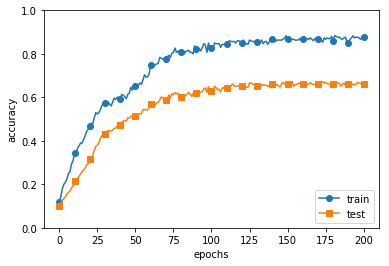

In [1]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.0966666666667, test acc:0.0902
epoch:1, train acc:0.09, test acc:0.0925
epoch:2, train acc:0.0966666666667, test acc:0.1021
epoch:3, train acc:0.12, test acc:0.1144
epoch:4, train acc:0.14, test acc:0.1298
epoch:5, train acc:0.183333333333, test acc:0.1517
epoch:6, train acc:0.206666666667, test acc:0.1768
epoch:7, train acc:0.236666666667, test acc:0.2012
epoch:8, train acc:0.26, test acc:0.2188
epoch:9, train acc:0.286666666667, test acc:0.2351
epoch:10, train acc:0.293333333333, test acc:0.2516
epoch:11, train acc:0.323333333333, test acc:0.2617
epoch:12, train acc:0.333333333333, test acc:0.2723
epoch:13, train acc:0.356666666667, test acc:0.2861
epoch:14, train acc:0.386666666667, test acc:0.2998
epoch:15, train acc:0.396666666667, test acc:0.3097
epoch:16, train acc:0.42, test acc:0.3189
epoch:17, train acc:0.42, test acc:0.3311
epoch:18, train acc:0.433333333333, test acc:0.3399
epoch:19, train acc:0.45, test acc:0.3543
epoch:20, train acc:0.463333333333, te

epoch:167, train acc:0.85, test acc:0.7084
epoch:168, train acc:0.85, test acc:0.699
epoch:169, train acc:0.853333333333, test acc:0.7032
epoch:170, train acc:0.853333333333, test acc:0.7051
epoch:171, train acc:0.846666666667, test acc:0.7045
epoch:172, train acc:0.846666666667, test acc:0.7069
epoch:173, train acc:0.843333333333, test acc:0.7049
epoch:174, train acc:0.86, test acc:0.7046
epoch:175, train acc:0.853333333333, test acc:0.7116
epoch:176, train acc:0.85, test acc:0.7092
epoch:177, train acc:0.843333333333, test acc:0.702
epoch:178, train acc:0.843333333333, test acc:0.6942
epoch:179, train acc:0.846666666667, test acc:0.6977
epoch:180, train acc:0.853333333333, test acc:0.7015
epoch:181, train acc:0.853333333333, test acc:0.699
epoch:182, train acc:0.85, test acc:0.7031
epoch:183, train acc:0.853333333333, test acc:0.7096
epoch:184, train acc:0.846666666667, test acc:0.7057
epoch:185, train acc:0.85, test acc:0.7096
epoch:186, train acc:0.85, test acc:0.7012
epoch:187, tr

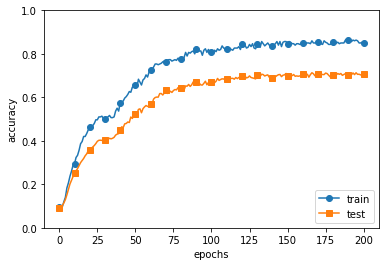

In [2]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.29922685534
=== epoch:1, train acc:0.116666666667, test acc:0.0966 ===
train loss:2.30121697548
train loss:2.3144353367
train loss:2.2814594335
=== epoch:2, train acc:0.116666666667, test acc:0.0999 ===
train loss:2.30003552897
train loss:2.29326822709
train loss:2.27215702656
=== epoch:3, train acc:0.116666666667, test acc:0.1029 ===
train loss:2.29090567452
train loss:2.28492676313
train loss:2.27646383201
=== epoch:4, train acc:0.116666666667, test acc:0.106 ===
train loss:2.29945324284
train loss:2.27939353564
train loss:2.29531751531
=== epoch:5, train acc:0.13, test acc:0.1107 ===
train loss:2.30068418477
train loss:2.30038146563
train loss:2.27960910923
=== epoch:6, train acc:0.136666666667, test acc:0.1149 ===
train loss:2.28488191359
train loss:2.27888103621
train loss:2.28205847044
=== epoch:7, train acc:0.15, test acc:0.1177 ===
train loss:2.27308357889
train loss:2.27325520588
train loss:2.28724722035
=== epoch:8, train acc:0.153333333333, test acc:0.1205 ===
t

=== epoch:64, train acc:0.376666666667, test acc:0.2691 ===
train loss:2.14298877278
train loss:2.12708943161
train loss:2.13366499515
=== epoch:65, train acc:0.373333333333, test acc:0.2636 ===
train loss:2.13340104156
train loss:2.10829123057
train loss:2.13756027378
=== epoch:66, train acc:0.37, test acc:0.2602 ===
train loss:2.17644528429
train loss:2.15221056925
train loss:2.18489572362
=== epoch:67, train acc:0.383333333333, test acc:0.2733 ===
train loss:2.14102431882
train loss:2.1276455942
train loss:2.10017164965
=== epoch:68, train acc:0.386666666667, test acc:0.2726 ===
train loss:2.14300238329
train loss:2.14775228146
train loss:2.11190463895
=== epoch:69, train acc:0.383333333333, test acc:0.2772 ===
train loss:2.10749328658
train loss:2.1076196899
train loss:2.04646858483
=== epoch:70, train acc:0.38, test acc:0.2788 ===
train loss:2.10745391743
train loss:2.17342526796
train loss:2.11720931104
=== epoch:71, train acc:0.403333333333, test acc:0.2894 ===
train loss:2.0542

=== epoch:127, train acc:0.513333333333, test acc:0.418 ===
train loss:1.91150338513
train loss:1.73387759585
train loss:1.73499454402
=== epoch:128, train acc:0.513333333333, test acc:0.4216 ===
train loss:1.83591466651
train loss:1.77238785175
train loss:1.53483067458
=== epoch:129, train acc:0.513333333333, test acc:0.4209 ===
train loss:1.73227675639
train loss:1.60242143561
train loss:1.58995326436
=== epoch:130, train acc:0.51, test acc:0.4175 ===
train loss:1.75561570958
train loss:1.68645461067
train loss:1.67220242762
=== epoch:131, train acc:0.503333333333, test acc:0.4182 ===
train loss:1.75082609294
train loss:1.70716302832
train loss:1.65680271854
=== epoch:132, train acc:0.506666666667, test acc:0.4219 ===
train loss:1.69259208387
train loss:1.63859782446
train loss:1.52955760404
=== epoch:133, train acc:0.516666666667, test acc:0.4197 ===
train loss:1.79873481783
train loss:1.68441102685
train loss:1.5017657218
=== epoch:134, train acc:0.513333333333, test acc:0.422 ===


=== epoch:190, train acc:0.556666666667, test acc:0.4901 ===
train loss:1.06103346273
train loss:1.16470787783
train loss:1.08944748176
=== epoch:191, train acc:0.556666666667, test acc:0.4897 ===
train loss:1.19081065759
train loss:0.911977876657
train loss:1.16520353662
=== epoch:192, train acc:0.556666666667, test acc:0.4904 ===
train loss:1.13905351595
train loss:1.08028663135
train loss:1.10783643434
=== epoch:193, train acc:0.556666666667, test acc:0.4914 ===
train loss:1.13600800289
train loss:1.15154530875
train loss:1.32510565324
=== epoch:194, train acc:0.56, test acc:0.4925 ===
train loss:1.17428188656
train loss:1.13203465725
train loss:1.22490139678
=== epoch:195, train acc:0.563333333333, test acc:0.496 ===
train loss:1.15865552162
train loss:1.12890238326
train loss:1.00458709289
=== epoch:196, train acc:0.57, test acc:0.4988 ===
train loss:1.15323098064
train loss:1.20521619419
train loss:1.10417806428
=== epoch:197, train acc:0.566666666667, test acc:0.4993 ===
train l

=== epoch:252, train acc:0.743333333333, test acc:0.587 ===
train loss:0.697147966114
train loss:0.73521965501
train loss:0.790934200956
=== epoch:253, train acc:0.743333333333, test acc:0.5852 ===
train loss:0.836641129719
train loss:0.621280579382
train loss:0.652909198775
=== epoch:254, train acc:0.74, test acc:0.582 ===
train loss:0.874444509418
train loss:0.707998252884
train loss:0.873032395843
=== epoch:255, train acc:0.746666666667, test acc:0.5892 ===
train loss:0.643209766682
train loss:0.657973364228
train loss:0.747709608928
=== epoch:256, train acc:0.743333333333, test acc:0.5877 ===
train loss:0.726522708212
train loss:0.733867049629
train loss:0.880819638311
=== epoch:257, train acc:0.753333333333, test acc:0.5963 ===
train loss:0.778360531466
train loss:0.674238160522
train loss:0.69473707575
=== epoch:258, train acc:0.75, test acc:0.5928 ===
train loss:0.885630221928
train loss:0.70618936091
train loss:0.790917780244
=== epoch:259, train acc:0.76, test acc:0.5989 ===
t

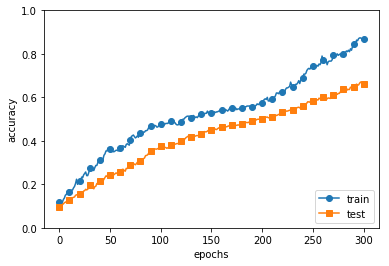

In [4]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()